In [15]:
import math
import statistics
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy.stats as stats # type: ignore
from scipy.stats import norm # type: ignore
from matplotlib.patches import Rectangle # type: ignore
from math import cos, sin

In [16]:
data = "Session_28_06_2024_HR10_MIN22_SEC20.csv"
cls = ["TrackingStamp", "TimeStamp", "X", "Y", "Angle", "PosterNumber", "TrialStamp"]
df = pd.read_csv(data, skiprows=46, names=cls)
stamp, time, x, y, yaw = np.loadtxt("BOUNDARIES.txt", skiprows=47, unpack = True)

# Create tuples with information of each poster 
posters = [
    (1, -12.27, -1.87, "Cat"), 
    (2, -2.77, 12.26, "Hippo"), 
    (3, 2.23, -1.87, "Fox"), 
    (4, 2.23, 7.63, "Rabbit"), 
    (5, -12.27, 17.13, "Crocodile"), 
    (6, -12.27, 7.63, "Pig")
    ]

x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)
dfs = []
index = df.index[df['TrialStamp'] == 1].tolist() 
index = [0] + index + [len(df)]
for i in range(len(index) - 1):
    starting_index = index[i]
    ending_index = index[i+1]
    new_df = df.iloc[starting_index:ending_index]
    dfs.append(new_df)
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:\n{df}\n")
if dfs:
    dfs.pop(0)


DataFrame 1:
    TrackingStamp  TimeStamp     X    Y  Angle  PosterNumber  TrialStamp
0               0   0.015981 -7.07 -4.8    0.0             0           0
1               0   0.020000 -7.07 -4.8    0.0             0           0
2               0   0.014646 -7.07 -4.8    0.0             0           0
3               0   0.017403 -7.07 -4.8    0.0             0           0
4               0   0.016615 -7.07 -4.8    0.0             0           0
5               0   0.016744 -7.07 -4.8    0.0             0           0
6               0   0.016374 -7.07 -4.8    0.0             0           0
7               0   0.017109 -7.07 -4.8    0.0             0           0
8               0   0.016376 -7.07 -4.8    0.0             0           0
9               0   0.016808 -7.07 -4.8    0.0             0           0
10              0   0.016443 -7.07 -4.8    0.0             0           0
11              0   0.016622 -7.07 -4.8    0.0             0           0
12              0   0.016898 -7.07 -4.

In [17]:
n_plots = len(dfs)
n_cols = 6
n_rows = math.ceil(n_plots/n_cols)
poster_animal = ""
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 8))
axes = axes.flatten()

for i, (df, ax) in enumerate(zip(dfs, axes)):
    poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (poster_number == 1):
        poster_animal = "Cat"
    elif (poster_number == 2):
        poster_animal = "Hippo"
    elif (poster_number == 3):
        poster_animal = "Fox"
    elif (poster_number == 4):
        poster_animal = "Rabbit"
    elif (poster_number == 5):
        poster_animal = "Crocodile"
    elif (poster_number == 6):
        poster_animal = "Pig"
        
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.scatter(df[sorted("X")], df[sorted("Y")], marker = '.')
    ax.set_title(f'Trial {i + 1} (Poster {poster_animal})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [18]:
dfs1 = []
dfs2 = []
dfs3 = []
dfs4 = []
dfs5 = []
dfs6 = []
for df in dfs:
    select_poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (select_poster_number == 1):
        dfs1.append(df)
    elif (select_poster_number == 2):
        dfs2.append(df)
    elif (select_poster_number == 3):
        dfs3.append(df)
    elif (select_poster_number == 4):
        dfs4.append(df)
    elif (select_poster_number == 5):
        dfs5.append(df)
    elif (select_poster_number == 6):
        dfs6.append(df)
dfs_lists = [dfs1, dfs2, dfs3, dfs4, dfs5, dfs6]

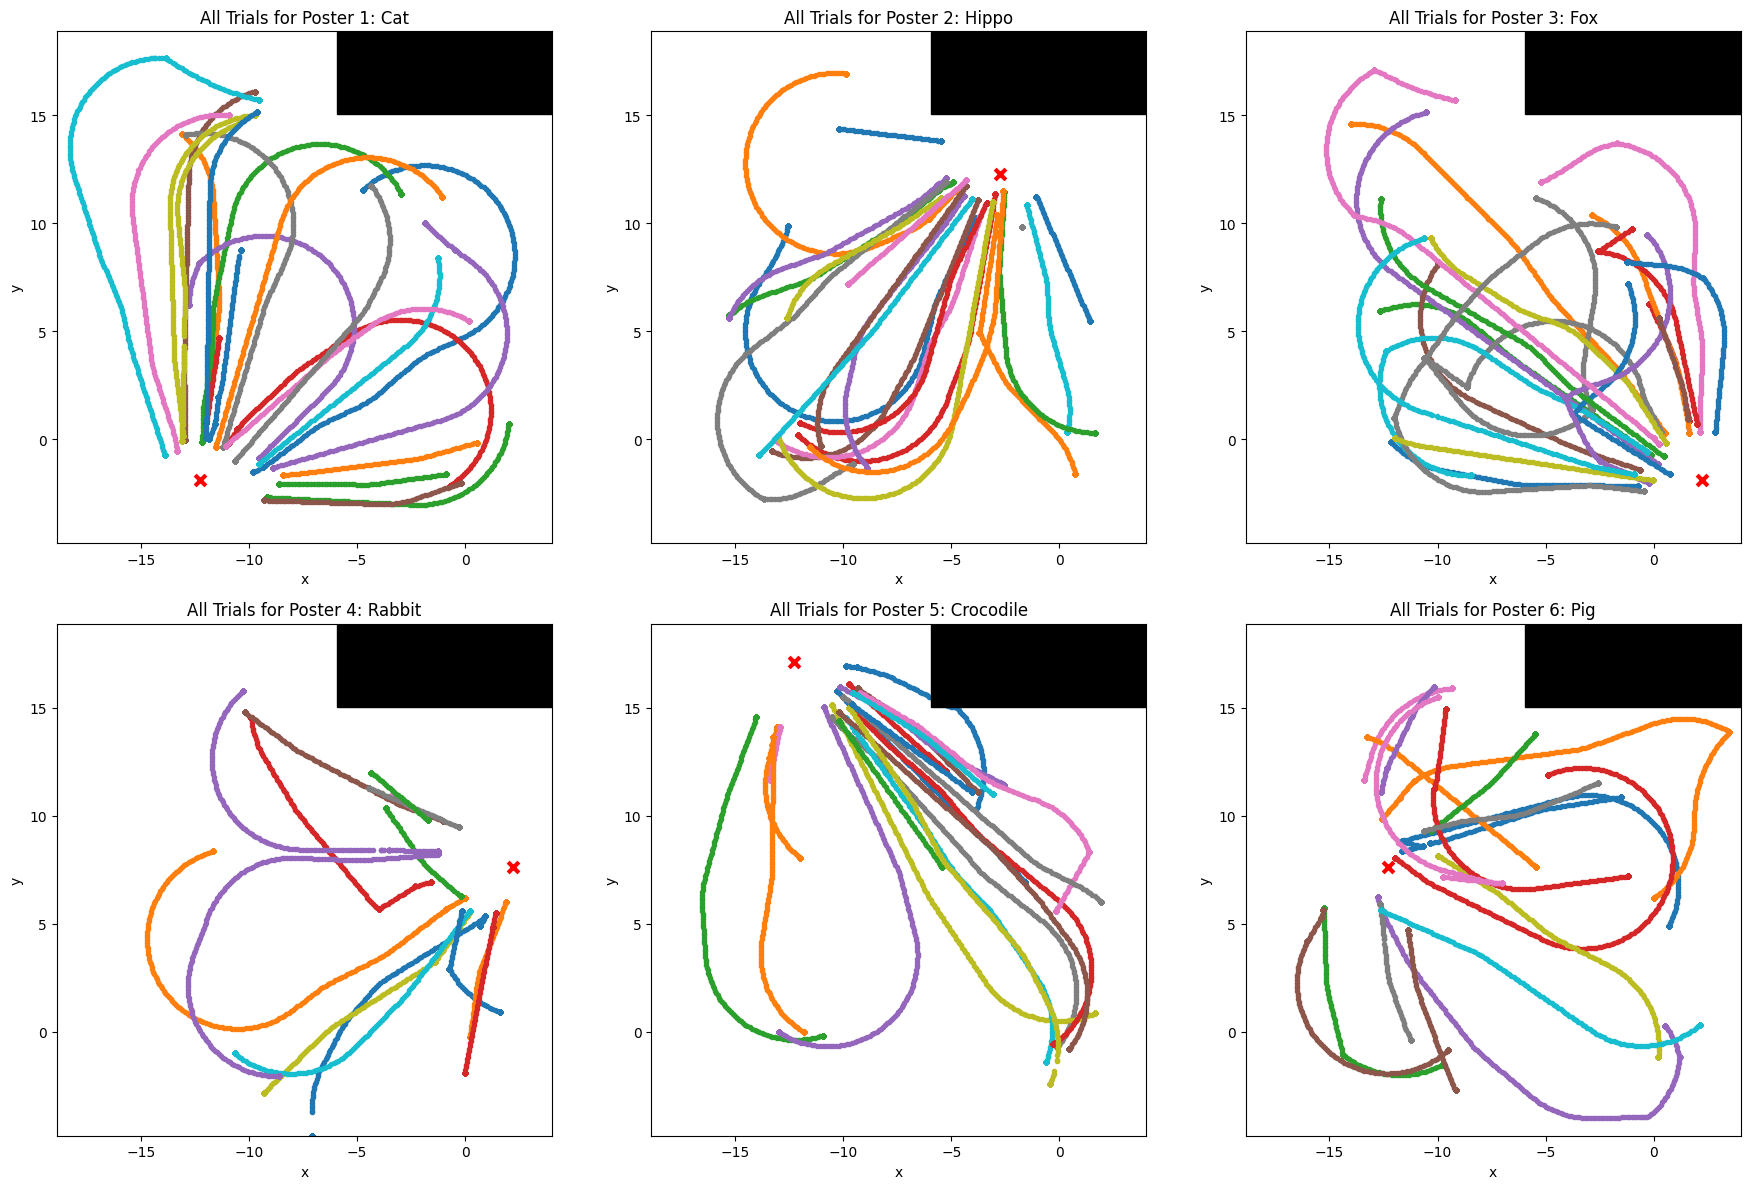

In [19]:
def plot_all(ax, dfs, tuple):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]

    for i, df in enumerate(dfs):
        ax.scatter(df['X'], df['Y'], marker = '.', label = f'Trial {i + 1}')
   
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster in zip(axes, dfs_lists, posters):
    plot_all(ax, dfs_list, poster)

plt.tight_layout()
plt.show()
#add green or red dot for correct 

In [20]:
x_values_sets = []
y_values_sets = []
angles_values_sets = []

for dfs_set in dfs_lists:
    x_values = []
    y_values = []
    angles = []
    for df in dfs_set: 
        filtered_df = df.loc[(df['TrialStamp'] == 3) | (df['TrialStamp'] == 4)]

        if not filtered_df.empty: 
            x_values.extend(filtered_df['X'].tolist())
            y_values.extend(filtered_df['Y'].tolist())
            angles.extend(filtered_df['Angle'].tolist())
    x_values_sets.append(x_values)
    y_values_sets.append(y_values)
    angles_values_sets.append(angles)

In [21]:
euclidean_distances = []
# add x and y data separately (add variance stats of each axis)
def euclidean_distance_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    errors = []
    
    for x, y in zip(x_values, y_values):
        euclidean_error = math.sqrt((target_x - x) ** 2 + (target_y - y) ** 2)
        errors.append(euclidean_error)
    euclidean_distance = sum(errors) / len(errors)
    return euclidean_distance

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    distance = round(euclidean_distance_error(x_values, y_values, poster),5)
    euclidean_distances.append(distance)

for i, distance in enumerate(euclidean_distances):
    print(f"Euclidean distance for {posters[i][3]}: {distance}")

Euclidean distance for Cat: 2.39859
Euclidean distance for Hippo: 1.89865
Euclidean distance for Fox: 2.53633
Euclidean distance for Rabbit: 3.24487
Euclidean distance for Crocodile: 3.03931
Euclidean distance for Pig: 3.15631


In [22]:
mean_absolute_errors = []

def mean_absolute_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    abs_errors = []
    
    for x, y in zip(x_values, y_values):
        absolute_error = abs(target_x - x) + abs(target_y - y)
        abs_errors.append(absolute_error)
    mean_absolute_error = sum(abs_errors) / len(abs_errors)
    return mean_absolute_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    absolute = round(mean_absolute_error(x_values, y_values, poster),5)
    mean_absolute_errors.append(absolute) 
    
for i, absolute in enumerate(mean_absolute_errors):
    print(f"Mean Absolute Error for {posters[i][3]}: {absolute}")

Mean Absolute Error for Cat: 2.93575
Mean Absolute Error for Hippo: 2.41692
Mean Absolute Error for Fox: 3.0997
Mean Absolute Error for Rabbit: 4.29284
Mean Absolute Error for Crocodile: 4.08342
Mean Absolute Error for Pig: 3.75878


In [23]:
root_mean_square_errors = []

def root_mean_square_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    rmse_errors = []
    
    for x, y in zip(x_values, y_values):
        root_mean_square_error = (target_x - x) ** 2 + (target_y - y) ** 2
        rmse_errors.append(root_mean_square_error)
    rmse_error = math.sqrt(sum(rmse_errors) / len(rmse_errors))
    return rmse_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    rmse_error = round(root_mean_square_error(x_values, y_values, poster),5)
    root_mean_square_errors.append(rmse_error) 
    
for i, rmse_error in enumerate(root_mean_square_errors):
    print(f"Root Mean Square Error for {posters[i][3]}: {rmse_error}")

Root Mean Square Error for Cat: 2.48534
Root Mean Square Error for Hippo: 1.99518
Root Mean Square Error for Fox: 2.56383
Root Mean Square Error for Rabbit: 3.33833
Root Mean Square Error for Crocodile: 3.0624
Root Mean Square Error for Pig: 3.935


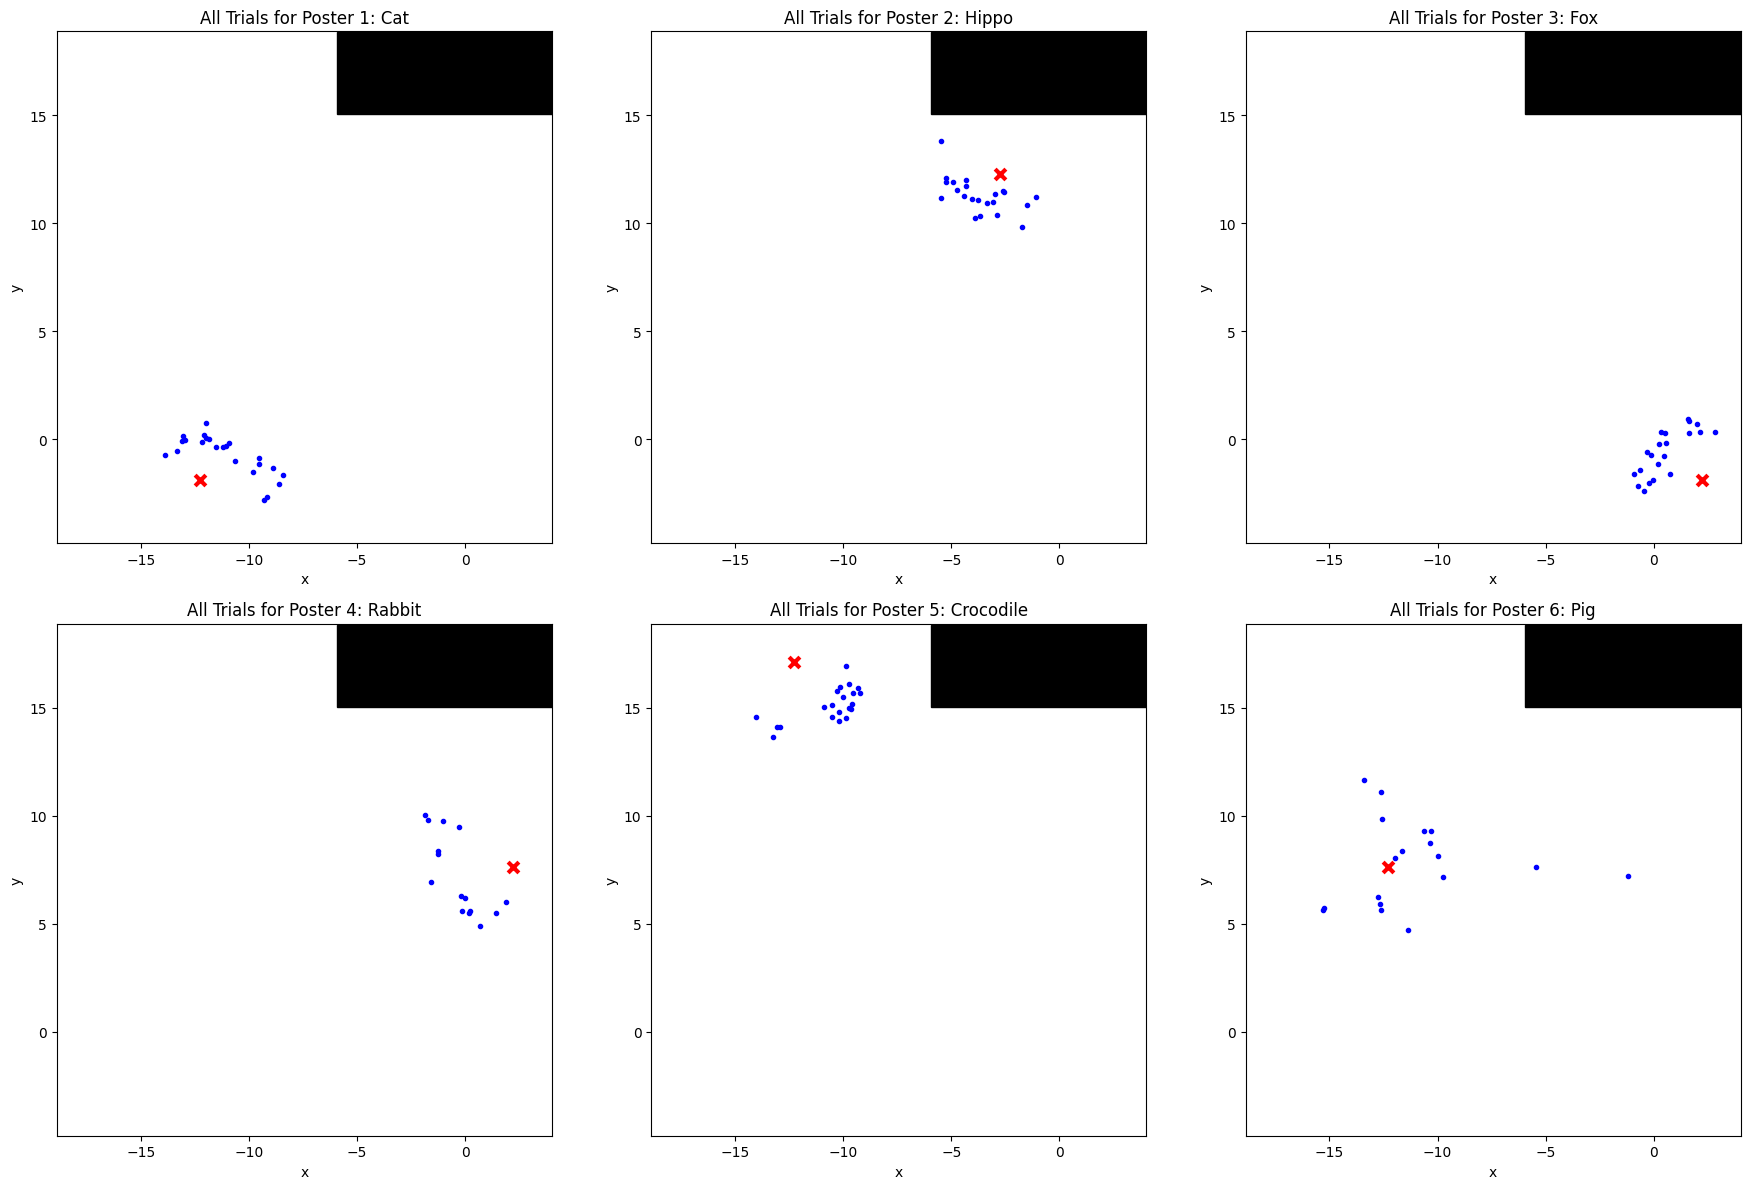

In [24]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for x, y in zip(x_values, y_values):
        ax.scatter(x, y, marker = '.', color='blue')

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')


fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()

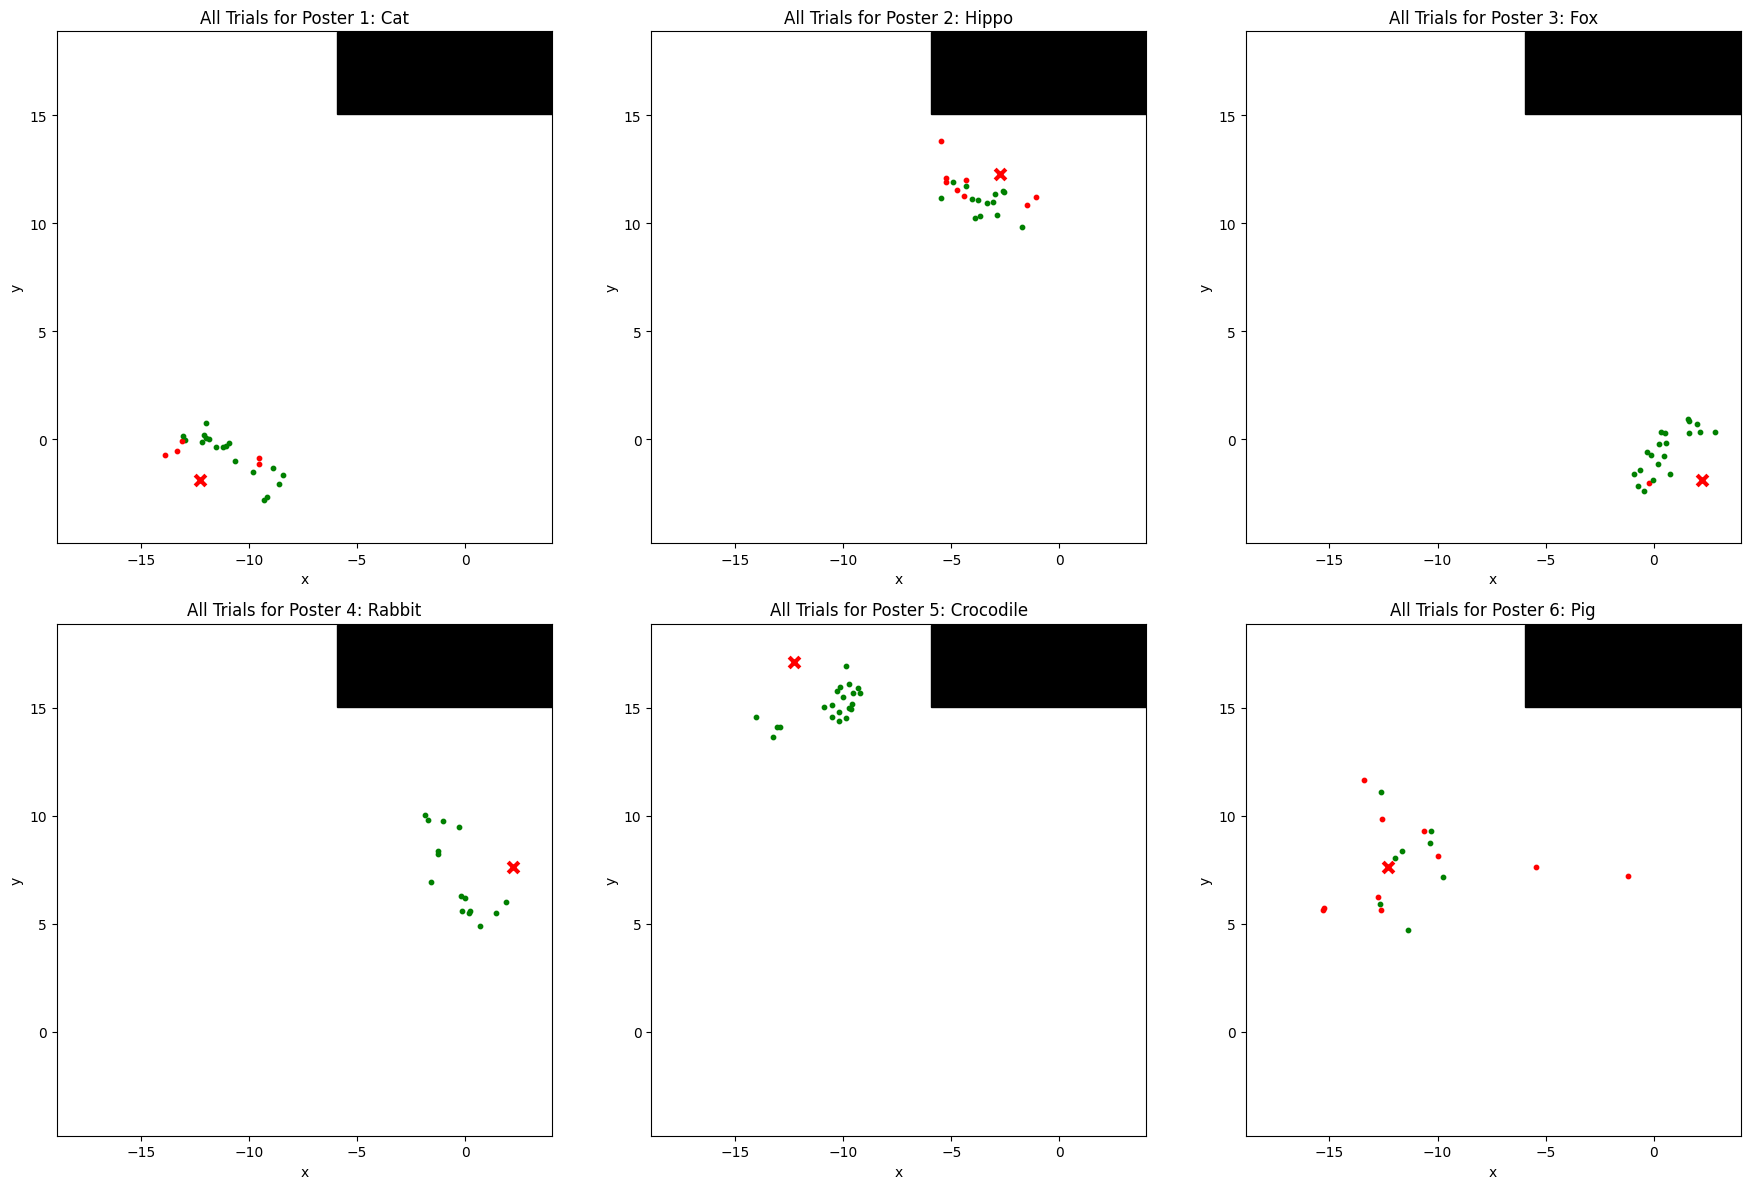

In [25]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for df, x, y in zip(dfs, x_values, y_values):
        if 4 in df['TrialStamp'].values:
            ax.scatter(x, y, marker='.', color='red', s=40)
        else:
            ax.scatter(x, y, marker='.', color='green', s=40)

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()

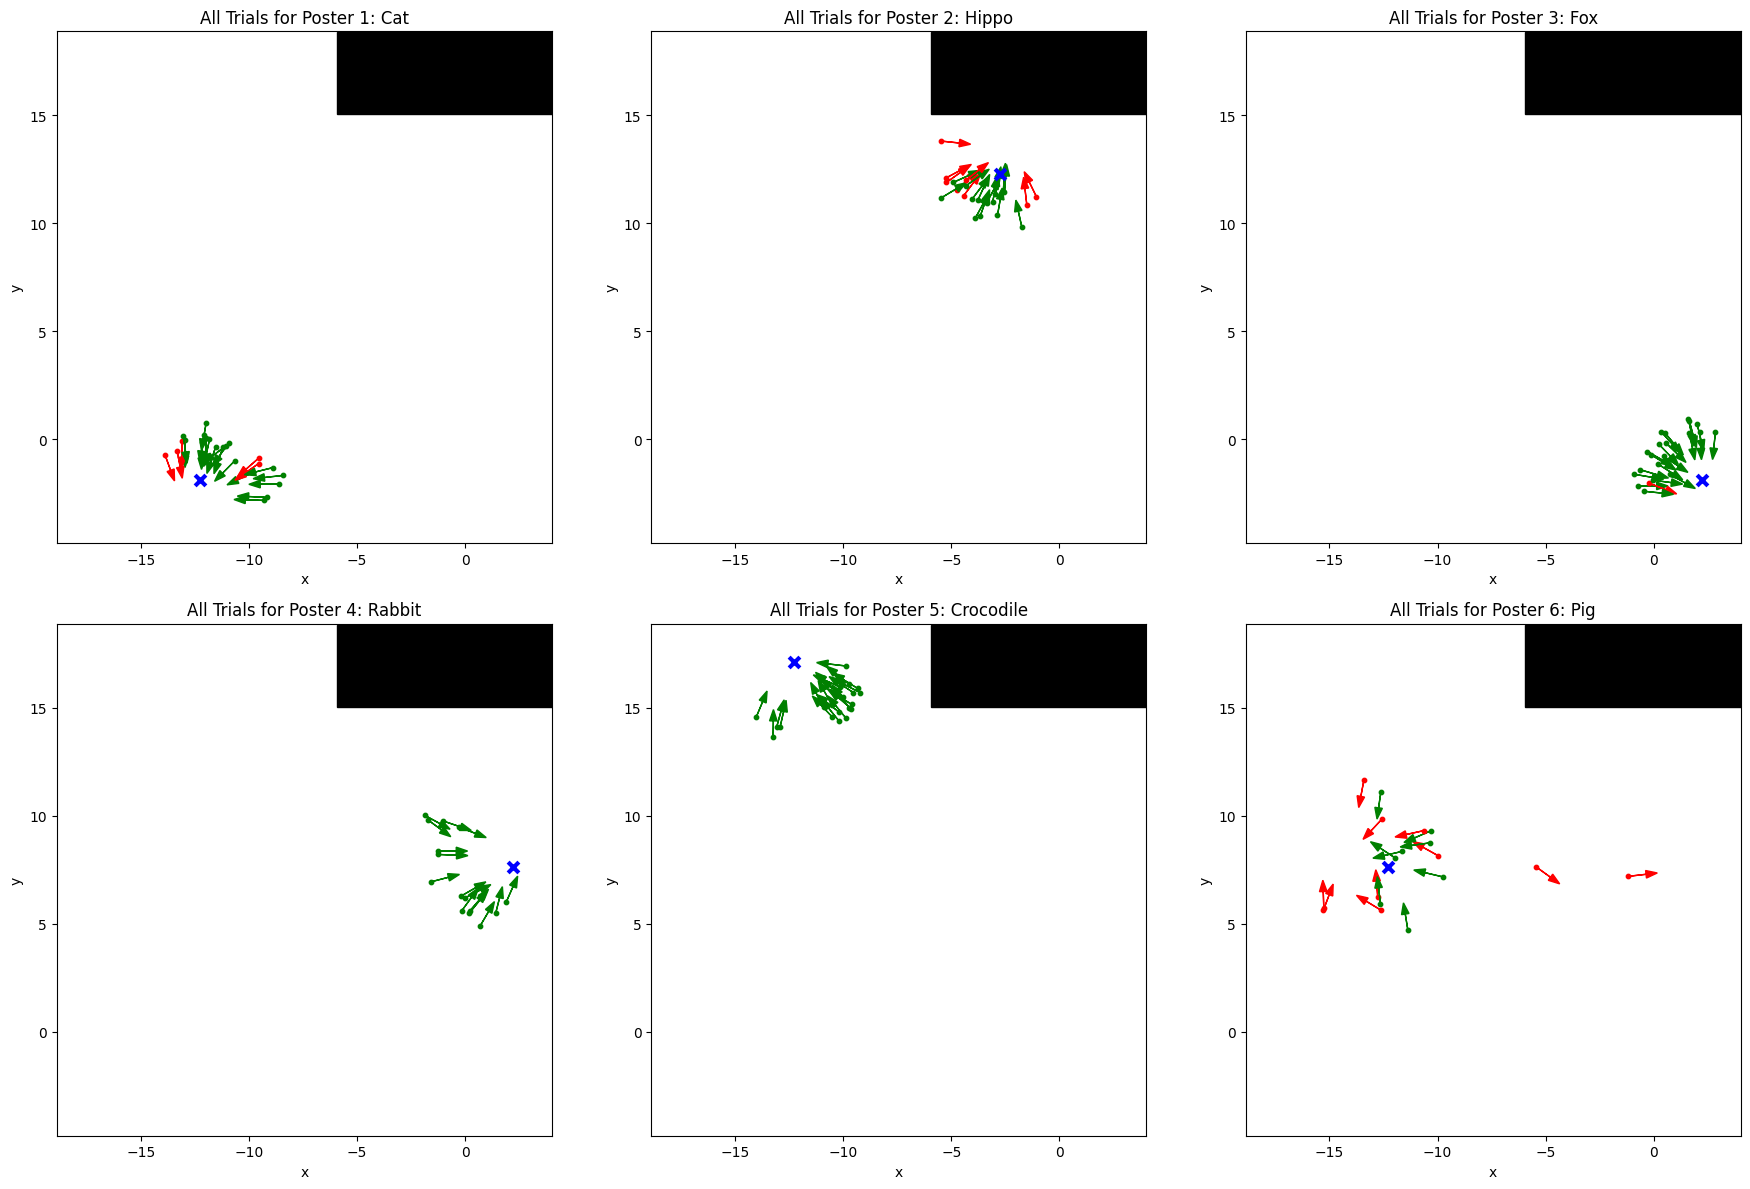

In [26]:
def plot_all(ax, dfs, tuple, x_values, y_values, angles):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for df, x, y, angle in zip(dfs, x_values, y_values, angles):
        if 4 in df['TrialStamp'].values:
            ax.scatter(x, y, marker='.', color='red', s=40)  
            cartesianAngleRadians = (450-angle) * math.pi/180.0 # I dont know why its 450 
            ax.arrow(x, y, (0.85 * cos(cartesianAngleRadians)), (0.75 * sin(cartesianAngleRadians)), color='red', head_width=0.35)
        else:
            ax.scatter(x, y, marker='.', color='green', s=40)
            cartesianAngleRadians = (450-angle) * math.pi/180.0
            ax.arrow(x, y, (0.85 * cos(cartesianAngleRadians)), (0.75 * sin(cartesianAngleRadians)), color='green', head_width=0.35)

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))

    ax.scatter(target_x, target_y, color='blue', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values, angles in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets, angles_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values, angles)

plt.tight_layout()
plt.show()

Some things to be noted: 

Every now and then after you get a poster wrong, the sim would rotate your character as if you were in the death scene while you are controlling your character. This can be seen in some of the graphs at the very top, where there is a random curved path towards the wall instead of towards a poster. Specifically trials 127 and 136. 

In Poster 3 and 4, there are two dots that look as if they were going to other posters. This is because of the fact that in some instances, the poster would disappear from the top, which could be significant in data collection if it happens to the monkey. 

There look to be come inconsistencies with what is tracked as a success or failure. Specifically with fox, one of the closest points is red due to the angle being slightly off. 

In [27]:
def basic_x_stats(dfs, tuple, x_vals): # Replicates 1-var stats on a Ti-84
    poster_num, target_x, animal = tuple[0], tuple[1], tuple[3]
    x_diffs = []

    for x in x_vals:
        x_diff = round((x - target_x),5)
        x_diffs.append(x_diff)
    mean_x = round(statistics.mean(x_diffs),5)

    x_sum_squares = []
    for x_diff in x_diffs:
        x_square_diff = (x_diff - mean_x) ** 2
        x_sum_squares.append(x_square_diff)

    sum_x = round(sum(x_diffs),5)
    x_sum_of_squares = round(sum(x_sum_squares),5)
    std_x, variance_x, pop_std_x = round(statistics.stdev(x_diffs),5), round(statistics.variance(x_diffs),5), round(statistics.pstdev(x_diffs),5)
    n_x, min_x, max_x = len(x_diffs), min(x_diffs), max(x_diffs)
    quantiles_x = statistics.quantiles(x_diffs, n=4), 
    print(f'Mean of x for Poster {poster_num}: {animal}:', mean_x)
    print(f'Sum of x for Poster {poster_num}: {animal}:', sum_x)
    print(f'Sum of squares of x for Poster {poster_num}: {animal}:', x_sum_of_squares)
    print(f'Standard deviation of x for Poster {poster_num}: {animal}:', std_x)
    print(f'Variance of x for Poster {poster_num}: {animal}:', variance_x)
    print(f'Population standard deviation of x for Poster {poster_num}: {animal}:', pop_std_x)
    print(f'Quartiles of x for Poster {poster_num}: {animal}:', quantiles_x)

    print()
    
def basic_y_stats(dfs, tuple, y_vals): # Replicates 1-var stats on a Ti-84
    poster_num, target_y, animal = tuple[0], tuple[2], tuple[3]
    y_diffs = []

    for y in y_vals:
        y_diff = round((y - target_y),5)
        y_diffs.append(y_diff)
    mean_y = round(statistics.mean(y_diffs),5)

    y_sum_squares = []
    for y_diff in y_diffs:
        y_square_diff = (y_diff - mean_y) ** 2
        y_sum_squares.append(y_square_diff)

    sum_y = round(sum(y_diffs),5)
    y_sum_of_squares = round(sum(y_sum_squares),5)
    std_y, variance_y, pop_std_y = round(statistics.stdev(y_diffs),5), round(statistics.variance(y_diffs),5), round(statistics.pstdev(y_diffs),5)
    # n_y, min_y, max_y = len(y_diffs), min(y_diffs), max(y_diffs)
    quantiles_y = statistics.quantiles(y_diffs, n=4), 

    print(f'Mean of y for Poster {poster_num}: {animal}:', mean_y)
    print(f'Sum of y for Poster {poster_num}: {animal}:', sum_y)
    print(f'Sum of squares of y for Poster {poster_num}: {animal}:', y_sum_of_squares)
    print(f'Standard deviation of y for Poster {poster_num}: {animal}:', std_y)
    print(f'Variance of y for Poster {poster_num}: {animal}:', variance_y)
    print(f'Population standard deviation of y for Poster {poster_num}: {animal}:', pop_std_y)
    print(f'Quartiles of y for Poster {poster_num}: {animal}:', quantiles_y)
    print()
for dfs_list, poster, x_values in zip(dfs_lists, posters, x_values_sets):
    basic_x_stats(dfs_list, poster, x_values)
print()
for dfs_list, poster, y_values in zip(dfs_lists, posters, y_values_sets):
    basic_y_stats(dfs_list, poster, y_values)

Mean of x for Poster 1: Cat: 1.18384
Sum of x for Poster 1: Cat: 27.2283
Sum of squares of x for Poster 1: Cat: 59.9534
Standard deviation of x for Poster 1: Cat: 1.6508
Variance of x for Poster 1: Cat: 2.72515
Population standard deviation of x for Poster 1: Cat: 1.61452
Quartiles of x for Poster 1: Cat: ([0.1158, 1.0631, 2.7363],)

Mean of x for Poster 2: Hippo: -0.92135
Sum of x for Poster 2: Hippo: -20.2696
Sum of squares of x for Poster 2: Hippo: 34.90863
Standard deviation of x for Poster 2: Hippo: 1.28931
Variance of x for Poster 2: Hippo: 1.66232
Population standard deviation of x for Poster 2: Hippo: 1.25967
Quartiles of x for Poster 2: Hippo: ([-2.004875, -1.05325, -0.0267],)

Mean of x for Poster 3: Fox: -1.67396
Sum of x for Poster 3: Fox: -35.1531
Sum of squares of x for Poster 3: Fox: 21.94976
Standard deviation of x for Poster 3: Fox: 1.04761
Variance of x for Poster 3: Fox: 1.09749
Population standard deviation of x for Poster 3: Fox: 1.02236
Quartiles of x for Poster 3

In [29]:
def cord_stats(dfs, tuple, x_vals, y_vals): 
    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    displacements = [] 
    for x, y, in zip(x_vals, y_vals):
        dx = target_x - x
        dy = target_y - y 
        displacement = round((dx**2 + dy**2) ** 0.5,5)
        displacements.append(displacement)
    std, variance, pop_std = round(statistics.stdev(displacements),5), round(statistics.variance(displacements),5), round(statistics.pstdev(displacements),5)
    quartiles = statistics.quantiles(displacements, n=4), 

    print(f'Standard deviation of displacements for Poster {poster_num}: {animal}:', std)
    print(f'Variance of displacements for Poster {poster_num}: {animal}:', variance)
    print(f'Population standard deviation of displacements for Poster {poster_num}: {animal}:', pop_std)
    print(f'Quartiles of displacements for Poster {poster_num}: {animal}:', quartiles)
    print()
for dfs_list, poster, x_values, y_values in zip(dfs_lists, posters, x_values_sets, y_values_sets):
    cord_stats(dfs_list, poster, x_values, y_values)

Standard deviation of displacements for Poster 1: Cat: 0.66553
Variance of displacements for Poster 1: Cat: 0.44293
Population standard deviation of displacements for Poster 1: Cat: 0.6509
Quartiles of displacements for Poster 1: Cat: ([1.92204, 2.08261, 2.91894],)

Standard deviation of displacements for Poster 2: Hippo: 0.6275
Variance of displacements for Poster 2: Hippo: 0.39376
Population standard deviation of displacements for Poster 2: Hippo: 0.61308
Quartiles of displacements for Poster 2: Hippo: ([1.51098, 1.906415, 2.3469700000000002],)

Standard deviation of displacements for Poster 3: Fox: 0.38379
Variance of displacements for Poster 3: Fox: 0.14729
Population standard deviation of displacements for Poster 3: Fox: 0.37454
Quartiles of displacements for Poster 3: Fox: ([2.253575, 2.59781, 2.856165],)

Standard deviation of displacements for Poster 4: Rabbit: 0.81194
Variance of displacements for Poster 4: Rabbit: 0.65925
Population standard deviation of displacements for Pos

In [ ]:
def angle_error()